<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

# 모델링(Modeling) 기법 선택

현재 올리지는 못했지만 올리고 싶었던 선택 알고리즘을 통해 모델링할 기법을 고름.

- 데이터가 글이나 시계열은 아님
- 범주를 예측함
- 데이터가 식별값을 가짐
- 그렇다면 분류에 해당함(로지스틱 회귀, 선형, 최근접, svm, 딥러닝, 의사결정 나무 등...)
- 2번째로는 의사결정 나무(Decsion Tree)를 실습하고자 함
- 로지스틱 회귀의 경우 이중분류라고 한다면, 의사결정 나무는 다중 분류라고 볼 수 있음. 두 가지의 결과를 비교하고자 함.

# KNN(최근접 이웃 회귀)란

KNN은 분류를 하기 위해 사용하는 알고리즘임

근접해있는 샘플들의 거리를 계산하여 분류하는 기법

KNN에서 K 는 "k개의 데이터와 비교하여 분류"를 뜻함

k개를 선택하기때문에 이또한 결정트리처럼 과대적합이나 과소적합이 일어날 수 있음

최근접 이웃 회귀도 지도학습으로 예측을 하는 기법

참고 출처 1 : <span> https://smecsm.tistory.com/53 </span>

참고 출처 2 : <span> https://wooono.tistory.com/88 </span>

# KNN(최근접 이웃 회귀) 실습

## 라이브러리 및 파일 불러오기

1. 라이브러리 불러오기
2. 파일 불러오기
3. 파일 전처리 (지금까지는 할 필요가 없지만 여기서는 필요)

In [2]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

# 모델링에 필요한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 평가를 위한 라이브러리 설치
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc # 정확도, 민감도 등
from sklearn.model_selection import cross_val_score # Roc 관련

In [3]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


### 파일 전처리 (정규화)

KNN에서는 정규화가 중요

모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표

정규화 없이 실행하면 결과의 차이가 나는 것을 알 수 있음

여기서 2 가지 정규화 방법 사용
1. Min-Max Normalization (최소-최대 정규화)
2. Z-Score Normalization (Z-점수 정규화)

아래 시각적으로 확인한 결과
- Age의 경우는 이상치가 민감하게 작용하지 않을거라고 판단 => 최소-최대 정규화
- Fare의 경우는 이상치가 민감하게 작용할거라 판단 => Z정규화

<span> https://hleecaster.com/ml-normalization-concept/ </span>

In [4]:
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,29.687991,32.204208,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,13.218614,49.693429,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,21.000000,7.910400,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,30.000000,14.454200,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,35.000000,31.000000,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,80.000000,512.329200,5.000000


<AxesSubplot:>

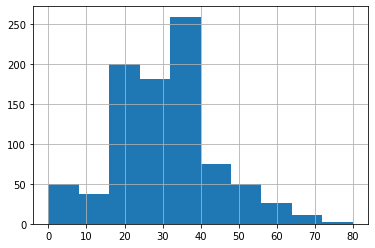

In [5]:
data["Age"].hist()

<AxesSubplot:>

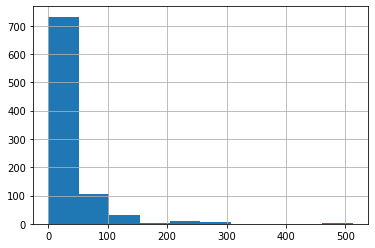

In [6]:
data["Fare"].hist()

#### 최소-최대 정규화

In [7]:
# 함수 선언 #
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [8]:
data["Age"] = min_max_normalize(data["Age"])
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,0.371100,32.204208,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,0.165233,49.693429,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,0.262500,7.910400,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,0.375000,14.454200,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,0.437500,31.000000,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,1.000000,512.329200,5.000000


<AxesSubplot:>

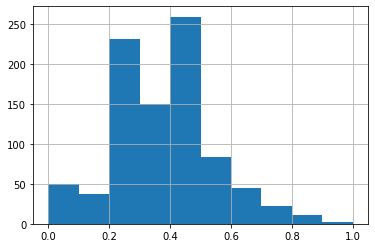

In [9]:
data["Age"].hist()

#### Z 정규화

In [10]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [11]:
data["Fare"] = z_score_normalize(data["Fare"])
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,0.371100,3.987333e-18,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,0.165233,1.000562e+00,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.484217e-01,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,0.262500,-4.891482e-01,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,0.375000,-3.573909e-01,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,0.437500,-2.424635e-02,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,1.000000,9.667167e+00,5.000000


<AxesSubplot:>

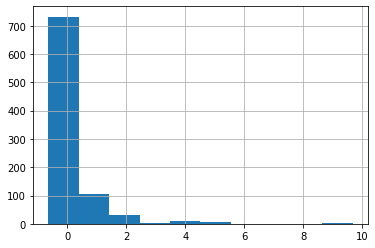

In [12]:
data["Fare"].hist()

## 데이터 분할

In [13]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## 모델링 및 모델 평가

1. 모델 만들기
2. 테스트 데이터로 예측
3. 모델 평가
4. 피드백 및 수정
5. 모델 평가

### 모델링

파라미터 설명
- n_neighbors
  > - 이게 K개를 뜻함.


- weights
  > - 'distance'로 설정하면, 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
  > - 디폴트 값 : 'uniform'


- metric
  > - 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)
  > - 디폴트 값 : 'minkowski'

In [14]:
# 모델링 #
knn_model = KNeighborsClassifier(n_neighbors = 3)

# 모델 학습
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가

1. 테스트 데이터로 예측
2. 모델 평가 지표들로 평가
 - 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
 - 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율
 - 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율 (= 민감도)
 - F-score : 정밀도와 재현율의 가중조화평균 (정밀도에 주어지는 가중치인 베타가 1인 경우 => F1-score)
 - ROC 곡선 : 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화
   - AUC(Area Under the Curve)는 ROC curve의 면적

3. 평가를 보면 학습 데이터에 대한 평가가 매우 좋음, 평가 데이터는 로지스틱에 비해 평가가 떨어지긴함
4. 하지만 DecisionTree는 다중 분류에서도 쓰이기 때문에 이것 하나로 단순히 좋고 안좋고를 판단하기엔 무리가 있음

In [15]:
# 테스트 데이터로 예측 #
y_pred = knn_model.predict(X_test)

In [16]:
# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,136,22
Real_False,30,80


In [17]:
# 데이터 셋 평가 비교 #
print("데이터 셋 평가 비교 ")
print("Train Set Score : {}".format(knn_model.score(X_train, Y_train)))
print("Test  Set Score : {}".format(knn_model.score(X_test, Y_test)))

데이터 셋 평가 비교 
Train Set Score : 0.8796147672552167
Test  Set Score : 0.8059701492537313


In [18]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       158
           1       0.78      0.73      0.75       110

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.81      0.80       268



In [19]:
# 직접 확인 
print("< KNN >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< KNN >
잘못 분류된 샘플 수 : 52
정확도(Accuracy) : 0.8059701492537313
정밀도(Precision) : 0.7843137254901961
재현율(Recall) : 0.7272727272727273
F1_Score : 0.7547169811320754


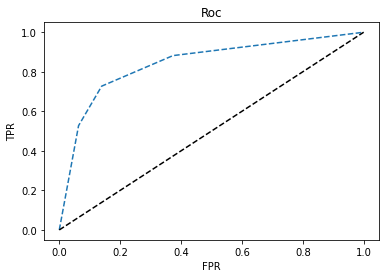

In [20]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, knn_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

## 최적화 (그리드서치)

적절한 매개변수를 찾기위해 여러가지 매개변수를 넣어보고 돌려보는 등의 작업이 이루어짐 => 모델의 최적화 작업

이러한 최적화 작업을 편하게 만들어 줌

1. 모델링을 위한 준비
2. 모델링
3. 학습
4. 평가

### 모델링을 위한 준비

원래 모델 함수에 어떠한 매개변수가 있는지 파악할 필요가 있음

In [21]:
# 돌려볼 매개변수 미리 선언
params = {
  "n_neighbors" : [4, 5, 6, 8, 10],
  "weights" : ['uniform', "distance"],
  "metric" : ["euclidean", "minkowski", "euclidean", "mahalanobis"]
  }

### 모델링

GridSearchCV 로 다시 모델링 설계

In [22]:
# 돌려볼 매개변수 미리 선언

# 그리드 서치로 모델링
## GridSearchCV(모델명, param_grid = 미리 선언한 매개변수, scoring = "확인할 평가지표", cv = 교차 검증에서 몇개로 분할되는지 지정, return_train_score = True)
grid_cv = GridSearchCV(knn_model, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 학습
grid_cv.fit(X_train, Y_train)

c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'minkowski', 'euclidean',
                                    'mahalanobis'],
                         'n_neighbors': [4, 5, 6, 8, 10],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

### 최적화 평가

In [23]:
# 데이터 프레임으로 받음
grid_result_df = pd.DataFrame(grid_cv.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_n_neighbors", "param_metric",  "param_weights", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score", ]]

## 그나마 인데스 번호 18, 28일때 가장 좋음 

,param_n_neighbors,param_metric,param_weights,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,4,euclidean,uniform,0.007802,0.867581,0.815471,13
1,4,euclidean,distance,0.006543,0.985953,0.802658,28
2,5,euclidean,uniform,0.006309,0.859555,0.820335,10
3,5,euclidean,distance,0.004003,0.985953,0.809084,22
4,6,euclidean,uniform,0.005365,0.855946,0.821935,4
5,6,euclidean,distance,0.004912,0.985953,0.810684,16
6,8,euclidean,uniform,0.004208,0.849526,0.826723,1
7,8,euclidean,distance,0.003798,0.985953,0.809071,25
8,10,euclidean,uniform,0.005304,0.839494,0.821884,7
9,10,euclidean,distance,0.004836,0.985953,0.810671,19


### 베스트 모델 평가

In [25]:
# 그리드서치의 베스트 모델을 가져오기
best_knn_model = grid_cv.best_estimator_
best_knn_predict = best_knn_model.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_knn_predict)

print("Best Knn Accuracy", best_accuracy)

Best Knn Accuracy 0.8022388059701493


In [26]:
# 직접 확인 
print("< Best Knn >")
print("잘못 분류된 샘플 수 : {}".format((best_knn_predict != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, best_dt_predict)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = best_dt_predict)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = best_dt_predict)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = best_dt_predict)))

< Best Knn >
잘못 분류된 샘플 수 : 53


NameError: name 'best_dt_predict' is not defined

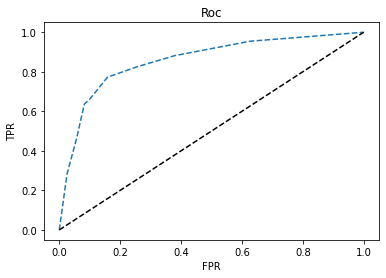

In [27]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [28]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = best_knn_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best Knn ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best Knn ] Roc_Auc : 0.8607211818069087 (+/- 0.03542097578440135)
